In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.transforms
from netCDF4 import Dataset

In [69]:
dir = './slidingco'
exp = [10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000]
stdvel = []
stdthk = []
costvel = []
costregu = []
maxvel = []
meanvel = []
maxthk = []
icevol = []

for e in exp:
    rms = np.loadtxt(dir + '/' + str(e) + '/rms_std.dat')
    stdvel.append(rms[-1, 3])
    stdthk.append(rms[-1, 1])

    costs = np.loadtxt(dir + '/' + str(e) + '/costs.dat')
    costvel.append(costs[-1, 0])
    costregu.append(costs[-1, 4])

    output = Dataset(dir + '/' + str(e) + '/output.nc')
    maxvel.append(np.max(output.variables['velbase_mag'][-1]))
    meanvel.append(np.mean(output.variables['velbase_mag'][-1]))
    maxthk.append(np.max(output.variables['thk'][-1]))
    icevol.append(np.sum(output.variables['thk'][-1] * 100**2 * 1e-9))

sliding_data = {
    'Directory': dir,
    'Experiment': exp,
    'Normalized': [(e - np.min(exp)) / (np.max(exp) - np.min(exp)) for e in exp],
    'STD velocity': stdvel,
    'STD ice thickness': stdthk,
    'COST velocity': costvel,
    'COST regularization': costregu,
    'MAX velocity': maxvel,
    'MEAN velocity': meanvel,
    'MAX ice thickness': maxthk,
    'Ice Volume': icevol
}
sliding = pd.DataFrame.from_dict(sliding_data)

In [62]:
dir = './anisotropy'
exp = ['005', '01', '02', '04', '08']
stdvel = []
stdthk = []
costvel = []
costregu = []
maxvel = []
meanvel = []
maxthk = []
icevol = []

for e in exp:
    rms = np.loadtxt(dir + '/' + str(e) + '/rms_std.dat')
    stdvel.append(rms[-1, 3])
    stdthk.append(rms[-1, 1])

    costs = np.loadtxt(dir + '/' + str(e) + '/costs.dat')
    costvel.append(costs[-1, 0])
    costregu.append(costs[-1, 4])

    output = Dataset(dir + '/' + str(e) + '/output.nc')
    maxvel.append(np.max(output.variables['velbase_mag'][-1]))
    meanvel.append(np.mean(output.variables['velbase_mag'][-1]))
    maxthk.append(np.max(output.variables['thk'][-1]))
    icevol.append(np.sum(output.variables['thk'][-1] * 100**2 * 1e-9))

anisotropy_data = {
    'Directory': dir,
    'Experiment': [int(e) * 0.1 for e in exp],
    'Normalized': [0.05, 0.1, 0.2, 0.4, 0.8],
    'STD velocity': stdvel,
    'STD ice thickness': stdthk,
    'COST velocity': costvel,
    'COST regularization': costregu,
    'MAX velocity': maxvel,
    'MEAN velocity': meanvel,
    'MAX ice thickness': maxthk,
    'Ice Volume': icevol
}
anisotropy = pd.DataFrame.from_dict(anisotropy_data)

In [63]:
dir = './thkregu'
exp = ['null', '01', '02', 'base', '10']
stdvel = []
stdthk = []
costvel = []
costregu = []
maxvel = []
meanvel = []
maxthk = []
icevol = []

for e in exp:
    rms = np.loadtxt(dir + '/' + str(e) + '/rms_std.dat')
    stdvel.append(rms[-1, 3])
    stdthk.append(rms[-1, 1])

    costs = np.loadtxt(dir + '/' + str(e) + '/costs.dat')
    costvel.append(costs[-1, 0])
    costregu.append(costs[-1, 4])

    output = Dataset(dir + '/' + str(e) + '/output.nc')
    maxvel.append(np.max(output.variables['velbase_mag'][-1]))
    meanvel.append(np.mean(output.variables['velbase_mag'][-1]))
    maxthk.append(np.max(output.variables['thk'][-1]))
    icevol.append(np.sum(output.variables['thk'][-1] * 100**2 * 1e-9))

thkregu_data = {
    'Directory': dir,
    'Experiment': [0, 0.1, 0.2, 1, 10],
    'Normalized': [0, 0.01, 0.02, 0.1, 1],
    'STD velocity': stdvel,
    'STD ice thickness': stdthk,
    'COST velocity': costvel,
    'COST regularization': costregu,
    'MAX velocity': maxvel,
    'MEAN velocity': meanvel,
    'MAX ice thickness': maxthk,
    'Ice Volume': icevol
}
thkregu = pd.DataFrame.from_dict(thkregu_data)

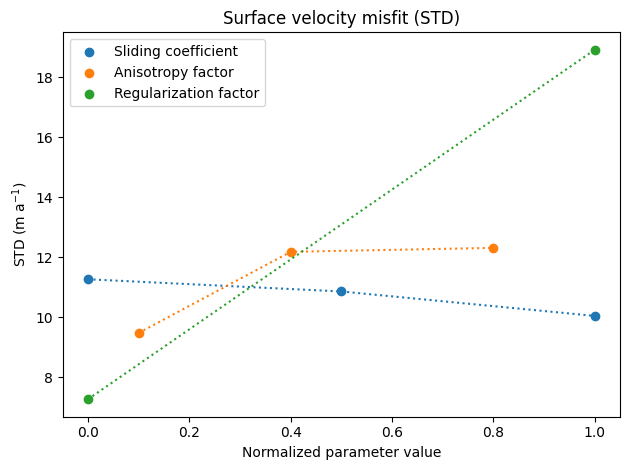

In [74]:
fig, ax = plt.subplots(sharey = True, sharex = True)

ax.scatter(sliding['Normalized'], sliding['STD velocity'], label = 'Sliding coefficient')
ax.plot(sliding['Normalized'], sliding['STD velocity'], linestyle = ':')

ax.scatter(anisotropy['Normalized'], anisotropy['STD velocity'], label = 'Anisotropy factor')
ax.plot(anisotropy['Normalized'], anisotropy['STD velocity'], linestyle = ':')

ax.scatter(thkregu['Normalized'], thkregu['STD velocity'], label = 'Regularization factor')
ax.plot(thkregu['Normalized'], thkregu['STD velocity'], linestyle = ':')
    
ax.set_title('Surface velocity misfit (STD)')
ax.set_ylabel('STD (m a$^{-1}$)')
ax.set_xlabel('Normalized parameter value')

plt.legend()
plt.tight_layout()
plt.show()